In [6]:
!pip install yt-dlp
!pip install pafy
!pip install moviepy
!pip install pydot



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
os.environ["PAFY_BACKEND"] = "internal"


In [11]:
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import *

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.utils import plot_model

E0000 00:00:1730272083.310199    1334 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1030 07:08:03.318637407    1334 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1030 07:08:03.318651888    1334 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1030 07:08:03.318655303    1334 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1030 07:08:03.318657727    1334 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1030 07:08:03.318660152    1334 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [23]:
try:
    # Detect TPUs and initialize
    tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu_resolver)
    tf.tpu.experimental.initialize_tpu_system(tpu_resolver)
    strategy = tf.distribute.TPUStrategy(tpu_resolver)
except ValueError:
    # Use MirroredStrategy for GPU or CPU
    strategy = tf.distribute.MirroredStrategy()

print("Number of accelerators:", strategy.num_replicas_in_sync)


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1730272264.723503    1334 service.cc:145] XLA service 0x58d952230940 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730272264.723562    1334 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1730272264.723567    1334 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1730272264.723570    1334 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1730272264.723573    1334 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1730272264.723575    1334 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1730272264.723578    1334 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1730272264.723580    1334 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1730272264.723583    1334 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)
I

In [1]:
# load .rar file with data

!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar


--2024-10-30 07:04:03--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/x-rar-compressed]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  25.9MB/s    in 2m 2s   

2024-10-30 07:06:06 (25.3 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]



In [2]:
# install uncpacking instruments

!apt-get update
!apt-get install -y unrar-free

Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8787 kB]
Get:5 http://deb.debian.org/debian bookworm-updates/main amd64 Packages.diff/Index [11.7 kB]
Get:6 http://deb.debian.org/debian bookworm-updates/main amd64 Packages T-2024-09-10-2011.55-F-2024-09-10-2011.55.pdiff [1116 B]
Get:6 http://deb.debian.org/debian bookworm-updates/main amd64 Packages T-2024-09-10-2011.55-F-2024-09-10-2011.55.pdiff [1116 B]
Get:7 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [190 kB]
Fetched 9244 kB in 1s (6236 kB/s)                        
Reading package lists... Done
N: Repository 'http://deb.debian.org/debian bookworm InRelease' changed its 'Version' value from '12.6' to '12.7'
Reading package lists... Done
Building dependency tree... Done
Re

In [ ]:
# unpach .rar file into normal folder
!unrar x UCF50.rar

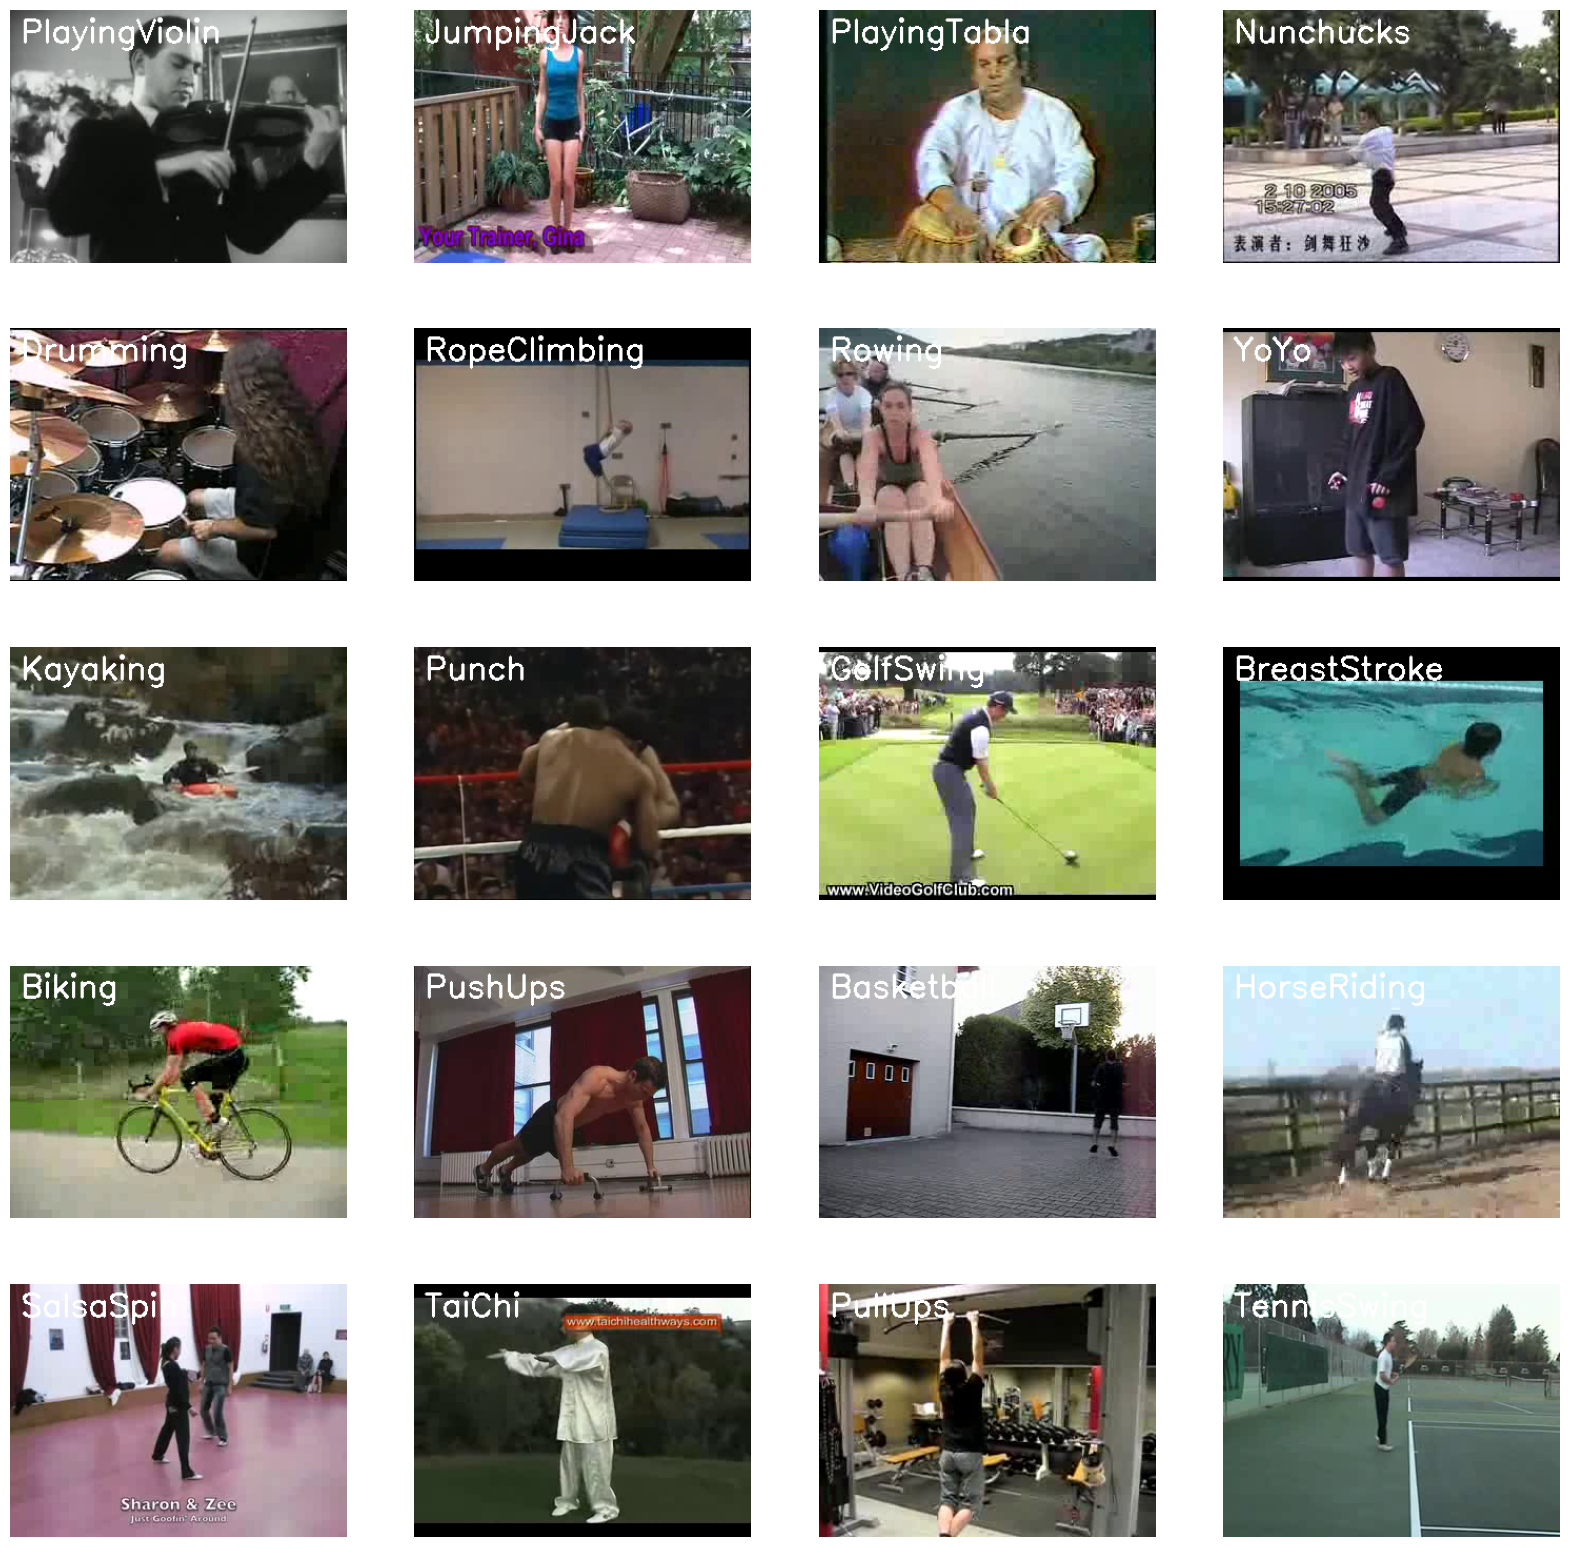

In [12]:
# to display first frame of each video

plt.figure(figsize=(20, 20))

all_class_names = os.listdir("/kaggle/working/UCF50")


# сhoose 20 random indicies in range from 0 to len(all_class_names)

random_range = random.sample(range(len(all_class_names)), 20)

for counter, random_index in enumerate(random_range, 1):

    selected_class_name = all_class_names[random_index]

    video_file_names_list = os.listdir(f"/kaggle/working/UCF50/{selected_class_name}")

    # choose a random file from video_file_names_list
    selected_video_file_name = random.choice(video_file_names_list)

    video_reader = cv2.VideoCapture(f'/kaggle/working/UCF50/{selected_class_name}/{selected_video_file_name}')

    ret, frame = video_reader.read()

    video_reader.release()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cv2.putText(frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    plt.subplot(5, 4, counter)

    plt.imshow(frame)

    plt.axis("off")


In [34]:
img_height, img_width = 64, 64

# amount of frames we want to extract
sequence_lengh = 40

dataset_dir = "/kaggle/working/UCF50"

classes_list = ['WalkingWithDog', 'TaiChi', "Swing", "HorseRace"]

In [35]:
# idea - to extract some specific amount of frames for each video (for ex. - 20)
# and put them into array

def frame_extraction(video_path):

    # each frame list will have 20 frames

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    # get total frame amount per video
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # interval for frames skip
    skip_frames_window = max(int(video_frames_count / sequence_lengh), 1)

    for frame_counter in range(sequence_lengh):

        # calculates to which frame it should move to choose a next one - calculate number of each next frame,
        # where  ' frame_counter * skip_frames_window ' - means index of frame move to
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        ret, frame = video_reader.read()

        if not ret:
            break

        resized_frame = cv2.resize(frame, (img_height, img_width))

        normilized_frame = resized_frame / 255

        frames_list.append(normilized_frame)

    video_reader.release()

    return frames_list


In [16]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_idx, class_name in enumerate(classes_list):

        print(f"Extracting data of class: {class_name}")

        files_list = os.listdir(os.path.join(dataset_dir, class_name))

        for file_name in files_list:

            video_file_path = os.path.join(dataset_dir, class_name, file_name)

            frames = frame_extraction(video_file_path)

            if len(frames) == sequence_lengh:

                features.append(frames)
                labels.append(class_idx)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths



In [36]:
features, labels, paths = create_dataset()

Extracting data of class: WalkingWithDog
Extracting data of class: TaiChi
Extracting data of class: Swing
Extracting data of class: HorseRace


In [37]:
encoded_labels = to_categorical(labels)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, encoded_labels, test_size = 0.2)

In [18]:
# # PYTOCH IMPLEMENTATION

# import torch
# from torch.utils.data import TensorDataset, DataLoader


# x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # или float, если у вас регрессия


# train_dataset = TensorDataset(x_train_tensor, y_train_tensor)


# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [39]:
# CONV-LSTM APPROACH


def create_model():
    
    with strategy.scope():
    
        model = Sequential([

    #        1)

            ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", 
                       data_format = "channels_last", recurrent_dropout = 0.2, 
                       return_sequences = True, 
                       input_shape = (sequence_lengh, img_height, img_width, 3)),

            MaxPooling3D(pool_size = (1, 2, 2), padding = 'same', data_format = "channels_last"),

            TimeDistributed(Dropout(0.2)),

    #       2)  

            ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = "tanh", 
                       data_format = "channels_last", recurrent_dropout = 0.2, 
                       return_sequences = True),

            MaxPooling3D(pool_size = (1, 2, 2), padding = 'same', data_format = "channels_last"),

            TimeDistributed(Dropout(0.2)),


    #       3)


            ConvLSTM2D(filters = 12, kernel_size = (3, 3), activation = "tanh", 
                       data_format = "channels_last", recurrent_dropout = 0.2, 
                       return_sequences = True),

            MaxPooling3D(pool_size = (1, 2, 2), padding = 'same', data_format = "channels_last"),

            TimeDistributed(Dropout(0.2)),

    #       4)


            ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = "tanh", 
                       data_format = "channels_last", recurrent_dropout = 0.2, 
                       return_sequences = True),

            MaxPooling3D(pool_size = (1, 2, 2), padding = 'same', data_format = "channels_last"),
            
            
            Flatten(),
            

            Dense(len(classes_list), activation = "softmax")
        
        
        
    ])
    
    model.summary()
    
    return model 
    
    

In [24]:
model = create_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 40, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 40, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 40, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 40, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 40, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 40, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 40, 13, 13, 12) │         8,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 40, 7, 7, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 40, 7, 7, 12)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)      │ (None, 40, 5, 5, 16)   │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 40, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │        23,044 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,436 (204.83 KB)

 Trainable params: 52,436 (204.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# plot_model(model, to_file = "model_structure.png", show_shapes = True, show_layer_names = True)

In [21]:
with strategy.scope():
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = "Adam",
        metrics = ["accuracy"]
    )

history = model.fit(x_train, y_train, epochs = 20, batch_size = 4, shuffle = True, validation_split = 0.2)

Epoch 1/20


2024-10-29 17:30:58.867302: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730223059.933150     844 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(3345c0ab5f20cf54:0:0), session_name()
I0000 00:00:1730223081.225364     844 tpu_compile_op_common.cc:245] Compilation of 3345c0ab5f20cf54:0:0 with session name  took 21.292142312s and succeeded
I0000 00:00:1730223081.338494     844 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(3345c0ab5f20cf54:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1808997368423802129", property.function_library_fingerprint = 1539139550118275436, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z =

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.3355 - loss: 1.4778

I0000 00:00:1730223108.489996     836 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(9f0415636e9662a1:0:0), session_name()
I0000 00:00:1730223110.646172     836 tpu_compile_op_common.cc:245] Compilation of 9f0415636e9662a1:0:0 with session name  took 2.156135829s and succeeded
I0000 00:00:1730223110.653992     836 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(9f0415636e9662a1:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_13106994562851272555", property.function_library_fingerprint = 16198216176120576142, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,40,64,64,3,;2,4,;", property.guaranteed_constants_size = 0, emb

78/78 ━━━━━━━━━━━━━━━━━━━━ 71s 397ms/step - accuracy: 0.3354 - loss: 1.4772 - val_accuracy: 0.1000 - val_loss: 1.4682
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 340ms/step - accuracy: 0.4196 - loss: 1.3353 - val_accuracy: 0.1000 - val_loss: 1.4289
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.4209 - loss: 1.3397 - val_accuracy: 0.4000 - val_loss: 1.2632
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.3637 - loss: 1.3642 - val_accuracy: 0.5000 - val_loss: 1.2695
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.3866 - loss: 1.2670 - val_accuracy: 0.5500 - val_loss: 0.9055
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 340ms/step - accuracy: 0.4004 - loss: 1.2290 - val_accuracy: 0.2500 - val_loss: 1.3473
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.3874 - loss: 1.1595 - val_accuracy: 0.6000 - val_loss: 0.8750
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.6539 - loss: 1.0464 - val_accuracy: 0.650

In [22]:
model.evaluate(x_test, y_test)

I0000 00:00:1730223628.017368     830 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(f5f21a3e5e24b178:0:0), session_name()


1/4 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 1.0000 - loss: 0.0063

I0000 00:00:1730223630.922215     830 tpu_compile_op_common.cc:245] Compilation of f5f21a3e5e24b178:0:0 with session name  took 2.904782076s and succeeded
I0000 00:00:1730223630.931190     830 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(f5f21a3e5e24b178:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_13106994562851272555", property.function_library_fingerprint = 16198216176120576142, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,40,64,64,3,;4,4,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730223630.931235     830 tpu_compilation_cache_interface.cc:541] After adding entry for key

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9051 - loss: 0.2675


[0.43024566769599915, 0.8461538553237915]

In [23]:
# with strategy.scope():
#     model.save_weights('/kaggle/working/lstm_model.weights.h5')


In [40]:
with strategy.scope():
    new_model = create_model()  
    new_model.load_weights('/kaggle/input/true-data/lstm_model.weights.h5')
    new_model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_12 (ConvLSTM2D)     │ (None, 40, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_12 (MaxPooling3D) │ (None, 40, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 40, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_13 (ConvLSTM2D)     │ (None, 40, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_13 (MaxPooling3D) │ (None, 40, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 40, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_14 (ConvLSTM2D)     │ (None, 40, 13, 13, 12) │         8,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_14 (MaxPooling3D) │ (None, 40, 7, 7, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 40, 7, 7, 12)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_15 (ConvLSTM2D)     │ (None, 40, 5, 5, 16)   │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_15 (MaxPooling3D) │ (None, 40, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │        23,044 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,436 (204.83 KB)

 Trainable params: 52,436 (204.83 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
new_model.evaluate(x_test, y_test)

2024-10-30 07:16:33.626294: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.
I0000 00:00:1730272594.062566   10463 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(7f1d4c04f6029270:0:0), session_name()


1/4 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.7500 - loss: 0.5350

I0000 00:00:1730272596.795269   10463 tpu_compile_op_common.cc:245] Compilation of 7f1d4c04f6029270:0:0 with session name  took 2.732645738s and succeeded
I0000 00:00:1730272596.801767   10463 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(7f1d4c04f6029270:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6814476876107909451", property.function_library_fingerprint = 9583531361185505914, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,40,64,64,3,;4,4,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730272596.801813   10463 tpu_compilation_cache_interface.cc:541] After adding entry for key 7

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7778 - loss: 0.7026

I0000 00:00:1730272597.268654   10490 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(809f0eef672c461b:0:0), session_name()


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 845ms/step - accuracy: 0.8051 - loss: 0.6674


I0000 00:00:1730272599.363398   10490 tpu_compile_op_common.cc:245] Compilation of 809f0eef672c461b:0:0 with session name  took 2.094703584s and succeeded
I0000 00:00:1730272599.371347   10490 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(809f0eef672c461b:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6814476876107909451", property.function_library_fingerprint = 9583531361185505914, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,40,64,64,3,;2,4,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730272599.371378   10490 tpu_compilation_cache_interface.cc:541] After adding entry for key 8

[0.6146422624588013, 0.8461538553237915]

In [56]:
# os.remove("/kaggle/working/model_cpu.keras")

In [51]:
def output(history, metric):
    plt.ylabel(metric)
    plt.xlabel("Epochs")
    plt.plot(history.history[metric], label = "train")
    plt.plot(history.history["val_" + metric], label = "validation")
    plt.legend()
    plt.show()

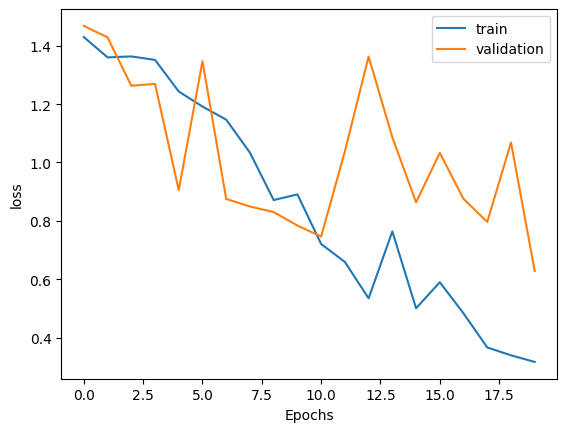

In [27]:
output(history, "loss")

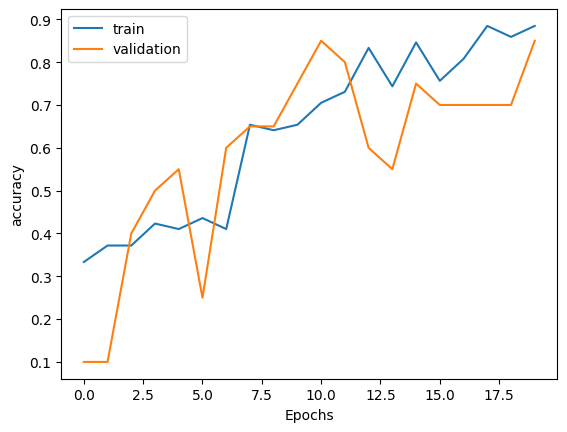

In [28]:
output(history, "accuracy")

In [ ]:
# model.save_weights('cnn_lstm.weights.h5')


In [55]:
classes = ['WalkingWithDog', 'TaiChi', "Swing", "HorseRace"]

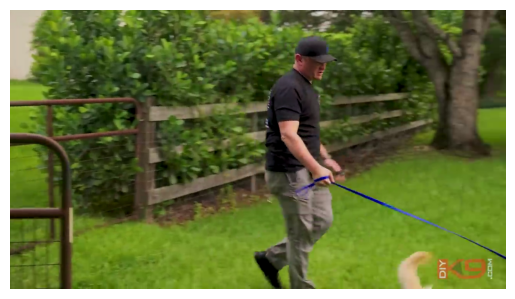

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
HorseRace


In [56]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model



sequence_length = 40
img_height = 64         
img_width = 64         

def preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True):
    
    
    cap = cv2.VideoCapture(video_path)

    
    frames = []
    
    while len(frames) < sequence_length:
        ret, frame = cap.read()
        
       
        
        if not ret:
            break
        
        if len(frames) == 1:
            first_frame = frame.copy()

        frame = cv2.resize(frame, (img_width, img_height))
        frame = frame / 255.0
        frames.append(frame)
        
        
    cap.release()
    
            
    if len(frames) > 0 and first_frame_out == True:
        first_frame_rgb = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
        plt.imshow(first_frame_rgb)
        plt.axis('off')
        plt.show()
        
    
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     plt.imshow(frame)
    
    
    if len(frames) < sequence_length:
        frames += [frames[-1]] * (sequence_length - len(frames))

    frames = frames[:sequence_length]
    
    return np.expand_dims(np.array(frames), axis=0)

# walking with dog

video_path = '/kaggle/input/test-videos/test_videos/dog.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = model.predict(test_video)
print(classes[int(np.argmax(predictions))])


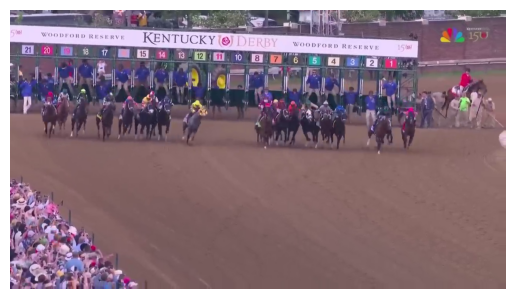

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
HorseRace


In [31]:
# horse race

video_path = '/kaggle/input/test-videos/test_videos/horse.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = model.predict(test_video)
print(classes[int(np.argmax(predictions))])

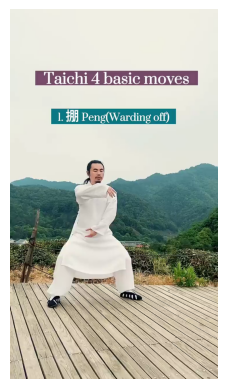

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Swing


In [32]:
# tai chi

video_path = '/kaggle/input/test-videos/test_videos/taichi.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = model.predict(test_video)
print(classes[int(np.argmax(predictions))])

In [44]:
sequence_lengh, img_height, img_width

(40, 64, 64)

In [45]:
# LRCN approach (less efective)

def create_LRCN_model():
    
    
    with strategy.scope():
    
        model = Sequential([

            TimeDistributed(Conv2D(16, (3, 3), padding = "same", activation = "relu"), input_shape = (sequence_lengh, img_height, img_width, 3)),
            TimeDistributed(MaxPooling2D(4, 4)),
            TimeDistributed(Dropout(0.25)),


            TimeDistributed(Conv2D(32, (3, 3), padding = "same", activation = "relu")),
            TimeDistributed(MaxPooling2D(4, 4)),
            TimeDistributed(Dropout(0.25)),

            TimeDistributed(Conv2D(64, (3, 3), padding = "same", activation = "relu")),
            TimeDistributed(MaxPooling2D(2, 2)),
            TimeDistributed(Dropout(0.25)),

            TimeDistributed(Conv2D(64, (3, 3), padding = "same", activation = "relu")),
            TimeDistributed(MaxPooling2D(2, 2)),
            TimeDistributed(Dropout(0.25)),

            TimeDistributed(Flatten()),

            LSTM(32),

            Dense(4, activation = "softmax")
        ])

    
    model.summary()

    return model

In [46]:
lrcn_model = create_LRCN_model()

  super().__init__(**kwargs)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_12             │ (None, 40, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 40, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 40, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 40, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 40, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 40, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 40, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 40, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 40, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 40, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 40, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 40, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 40, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,060 (285.39 KB)

 Trainable params: 73,060 (285.39 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
with strategy.scope():

    lrcn_model.compile(
        loss = "categorical_crossentropy",
        optimizer = "Adam",
        metrics = ['accuracy']

    )
    
    history = lrcn_model.fit(x_train, y_train, epochs = 50, batch_size = 4, shuffle = True, validation_split = 0.2)

Epoch 1/50


2024-10-30 07:17:44.485225: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730272666.256625   10493 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(832f704932b52fe8:0:0), session_name()
I0000 00:00:1730272723.752424   10493 tpu_compile_op_common.cc:245] Compilation of 832f704932b52fe8:0:0 with session name  took 57.495736093s and succeeded
I0000 00:00:1730272724.100316   10493 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(832f704932b52fe8:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_4592480400461362092", property.function_library_fingerprint = 7144587732326691762, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z =

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2161 - loss: 1.4316

2024-10-30 07:20:13.827772: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.
I0000 00:00:1730272814.537825   10420 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(fd13255ff52c63f2:0:0), session_name()
I0000 00:00:1730272818.986098   10420 tpu_compile_op_common.cc:245] Compilation of fd13255ff52c63f2:0:0 with session name  took 4.448211011s and succeeded
I0000 00:00:1730272819.011626   10420 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(fd13255ff52c63f2:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_13040724178569980948", property.function_library_fingerprint = 17118203847269128028, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, to

78/78 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.2168 - loss: 1.4312 - val_accuracy: 0.3000 - val_loss: 1.3913
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.2800 - loss: 1.3933 - val_accuracy: 0.2000 - val_loss: 1.3932
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3500 - loss: 1.3675 - val_accuracy: 0.3000 - val_loss: 1.4573
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3759 - loss: 1.2758 - val_accuracy: 0.2000 - val_loss: 1.3836
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4160 - loss: 1.3381 - val_accuracy: 0.2000 - val_loss: 1.3937
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4720 - loss: 1.3801 - val_accuracy: 0.4500 - val_loss: 1.3873
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3836 - loss: 1.2442 - val_accuracy: 0.2500 - val_loss: 1.3240
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4748 - loss: 1.2393 - val_accuracy: 0.1000 - val_loss: 1.6890
Ep

In [48]:
lrcn_model.evaluate(x_test, y_test)

2024-10-30 08:41:08.949587: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.
I0000 00:00:1730277669.674054   10497 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(d3c6a7aa4da39243:0:0), session_name()


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.5997

I0000 00:00:1730277676.952688   10497 tpu_compile_op_common.cc:245] Compilation of d3c6a7aa4da39243:0:0 with session name  took 7.278540991s and succeeded
I0000 00:00:1730277676.987233   10497 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(d3c6a7aa4da39243:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_18360957579658008580", property.function_library_fingerprint = 9556421746896936830, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,40,64,64,3,;4,4,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730277676.987276   10497 tpu_compilation_cache_interface.cc:541] After adding entry for key 

4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7269 - loss: 0.6437


I0000 00:00:1730277681.348653   10442 tpu_compile_op_common.cc:245] Compilation of 7871afce71e1bc39:0:0 with session name  took 4.228543799s and succeeded
I0000 00:00:1730277681.370310   10442 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(7871afce71e1bc39:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_18360957579658008580", property.function_library_fingerprint = 9556421746896936830, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,40,64,64,3,;2,4,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730277681.370350   10442 tpu_compilation_cache_interface.cc:541] After adding entry for key 

[0.7095905542373657, 0.692307710647583]

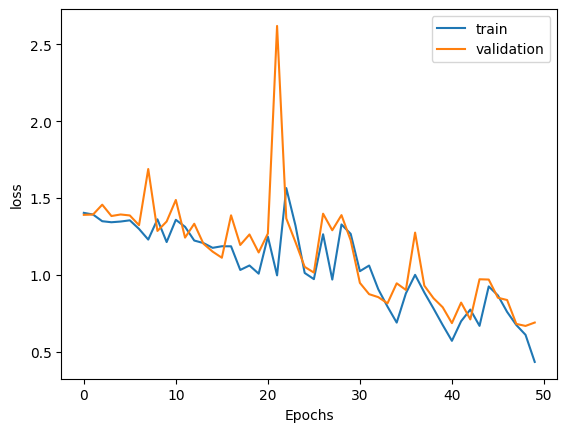

In [52]:
output(history, "loss")

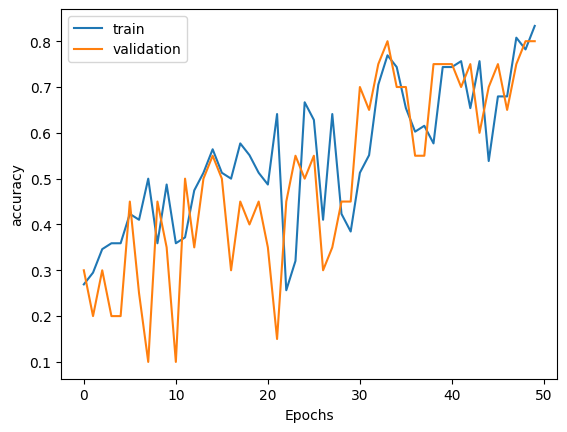

In [53]:
output(history, "accuracy")

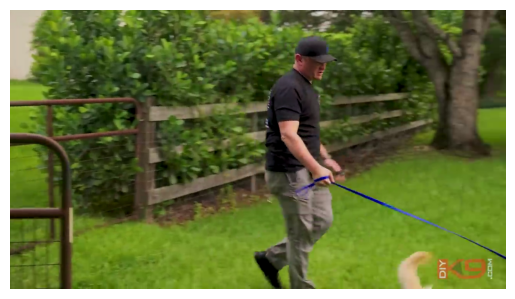

I0000 00:00:1730277768.736709   10421 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(4a9c7500f0d467f6:0:0), session_name()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
WalkingWithDog


I0000 00:00:1730277774.266094   10421 tpu_compile_op_common.cc:245] Compilation of 4a9c7500f0d467f6:0:0 with session name  took 5.529341397s and succeeded
I0000 00:00:1730277774.287548   10421 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(4a9c7500f0d467f6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_18348161598772153806", property.function_library_fingerprint = 3279249711701927519, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,40,64,64,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730277774.287589   10421 tpu_compilation_cache_interface.cc:541] After adding entry for k

In [57]:
video_path = '/kaggle/input/test-videos/test_videos/dog.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = lrcn_model.predict(test_video)
print(classes[int(np.argmax(predictions))])

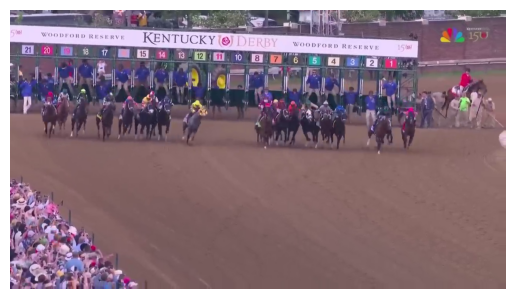

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Swing


In [58]:
video_path = '/kaggle/input/test-videos/test_videos/horse.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = lrcn_model.predict(test_video)
print(classes[int(np.argmax(predictions))])

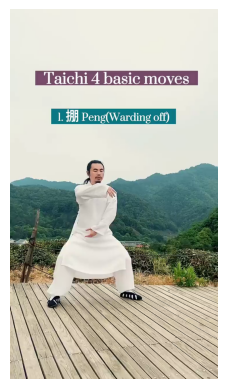

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Swing


In [59]:
video_path = '/kaggle/input/test-videos/test_videos/taichi.mp4'
test_video = preprocess_video(video_path, sequence_length, img_height, img_width, first_frame_out = True)
predictions = lrcn_model.predict(test_video)
print(classes[int(np.argmax(predictions))])